# COMP30760 - Assignment 1 - Student ID: 19206730

## Task 2

This notebook covers Task 2 - Data Preparation and Analysis. In this task, the data collected from the Genius open web API in Task 1 is analysed and investigated in order to make assumptions on certain trends.

In [457]:
# importing needed libraries:
import json
from pathlib import Path
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Directories are created for data storage:

In [458]:
# directory for raw data storage:
dir_raw = Path("genius_raw")
# directory for storing clean pre-processed data:
dir_data = Path("genius_data")
# making sure the folder exists:
dir_data.mkdir(parents=True, exist_ok=True)

Previously used artist names are defined again with their corresponding rankings in Spotify's Top 50 Streamed Artists.

The method "get_artist_data" is created to retrieve a given artist's inforrmation from it's associated file. Here, all files are created in the structure of: "path/NameRank.json" to make the process of loading, saving and looping through files easier.

In [459]:
artist_names = {"Drake":1, "Ed Sheeran":3,  "The Weeknd":4, "Taylor Swift":5, "Ariana Grande":7, 
                "Eminem":8, "Post Malone":9, "Billie Eilish":13, "XXXTENTACION":18, "Khalid":20, "Rihanna":21, 
                "Travis Scott":23, "Bruno Mars":26, "Beyonce":32, "Lady Gaga": 37, "J. Cole": 38, "Nicki Minaj": 39, 
                "Adele": 40}

def get_artist_data(name, names_dict):
    artist_path = "/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_raw/artist" + str(names_dict[name]) + ".json"
    with open(artist_path, "r") as fr: 
        artist_data = json.load(fr)
    return artist_data

### Data Preprocessing

Reiterating on the initial data preprocessing and clean up in the first task, second task improves on the previously created data frame by introducing a method that stores all relevant artist data from different artist files. This relevant data (such as artist names, song titles, pyong counts, page views, release dates and featured artists information) is picked to be parsed and merged together in a file. 

The method also utilises the previously created get_artist_data() method by looping through the artists dictionary to access each artist's data.

In [460]:
def parse_and_merge_raw_data(names_dict):
    metadata_rows = []
    
    for name in names_dict:
        artist_data = get_artist_data(name, names_dict)

        for info in artist_data["response"]["hits"]:
            row = {"Artist Name": name, "Song Title": info["result"]["title_with_featured"], "Rank":names_dict[name]}
            row["Pyong Count"] = info["result"]["pyongs_count"]
            row["Page Views"] = info["result"]["stats"]["pageviews"]
            row["Release Month"] = int(info["result"]["release_date_components"]["month"])
            if info["result"]["featured_artists"] != []:
                row["Featured"] = True
            else: 
                row["Featured"] = False
            metadata_rows.append(row)
            
    df = pd.DataFrame(metadata_rows)
    df.set_index("Artist Name", inplace=True)

    return df

The merging and parsing method above in use creates a file containing all relevant data that will be used in future analysis:

This file is organised in the orient="records" structure to preserve easy reading and access. 

In [461]:
df = parse_and_merge_raw_data(artist_names)
#df.to_json("/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_raw/all_artists.json", orient="split")
df.to_json("/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_data/all_artists.json", orient="records")
df

,Song Title,Rank,Pyong Count,Page Views,Release Month,Featured
Artist Name,,,,,,
Drake,God's Plan,1,932,9236547,1,False
Drake,In My Feelings,1,212,7459807,6,False
Drake,Hotline Bling,1,644,6960256,7,False
Drake,One Dance (Ft. Kyla & WizKid),1,233,6041789,4,True
Drake,"Hold On, We're Going Home (Ft. Majid Jordan)",1,506,5507582,8,True
...,...,...,...,...,...,...
Adele,All I Ask,40,44,1061669,11,False
Adele,Set Fire to the Rain,40,105,1054230,1,False
Adele,Let It Go,40,258,758844,11,False


Since the data was originally organised in different files for each artist in Task 1, there is a bit less work to do for preprocessing in Task 2. For this section, the counts of each artists' songs on Genius that are stored in individual folders are put together. It can be seen that these files contain the same number of songs which provides an equal comparing environment for future investigations.

In [462]:
def number_of_songs(name, name_dict, directory):
    for fpath in directory.iterdir():
        if fpath.suffix == ".json":
            song_list = []
            song_count = 0
            artist_data = get_artist_data(name, name_dict)
            for song in artist_data["response"]["hits"]:
                if song["type"] == "song":
                    song_list.append(song)
                    song_count += 1
    return len(song_list)+1
            
for artist in artist_names:
    print("%s - Rank: %d - %d songs on Genius" % (artist, artist_names[artist], number_of_songs(artist, artist_names, dir_raw)))

Drake - Rank: 1 - 11 songs on Genius
Ed Sheeran - Rank: 3 - 11 songs on Genius
The Weeknd - Rank: 4 - 11 songs on Genius
Taylor Swift - Rank: 5 - 11 songs on Genius
Ariana Grande - Rank: 7 - 11 songs on Genius
Eminem - Rank: 8 - 11 songs on Genius
Post Malone - Rank: 9 - 11 songs on Genius
Billie Eilish - Rank: 13 - 11 songs on Genius
XXXTENTACION - Rank: 18 - 11 songs on Genius
Khalid - Rank: 20 - 11 songs on Genius
Rihanna - Rank: 21 - 11 songs on Genius
Travis Scott - Rank: 23 - 11 songs on Genius
Bruno Mars - Rank: 26 - 11 songs on Genius
Beyonce - Rank: 32 - 11 songs on Genius
Lady Gaga - Rank: 37 - 11 songs on Genius
J. Cole - Rank: 38 - 11 songs on Genius
Nicki Minaj - Rank: 39 - 11 songs on Genius
Adele - Rank: 40 - 11 songs on Genius


### Data Parsing and Merging & Data Verification - Saving and Loading

Here is a modification on the "parse_and_merge_raw_data()" method above for creating data frames for a particular artist. The function takes in an artist name with the file path to their corresponding json file in order to generate a data frame containing the parsed artist information.

In [463]:
def parse_raw_file(names_dict, name, fpath):
    
    a_rows = []

    with open(fpath, "r") as fr: 
        artist_json = json.load(fr)

    for info in artist_json["response"]["hits"]:
        row = {"Artist Name": name,"Song Title": info["result"]["title_with_featured"], "Rank": names_dict[name]}
        row["Pyong Count"] = info["result"]["pyongs_count"]
        row["Page Views"] = info["result"]["stats"]["pageviews"]
        row["Release Month"] = int(info["result"]["release_date_components"]["month"])
        if info["result"]["featured_artists"] != []:
            row["Featured"] = True
        else: 
            row["Featured"] = False
        a_rows.append(row)

    a_df = pd.DataFrame(a_rows)
    a_df.set_index("Song Title", inplace=True)

    return a_df

A helper method is created to be used in with the "merge_raw_files()" method below that takes in a file path and data frame to dump this data frame's information into a newly created file that is stored on the given path. The method "merge_raw_files()" below is designed to take in a dictionary of artist names along with the individual artist names that are being investigated.

In [464]:
def saving_file(new_path, dataframe):
    
    with open(new_path, "w") as newp:
        json_merged_df = dataframe.to_json(new_path, orient="columns")
        json.dump(json_merged_df, newp, indent=2)

In [465]:
def merge_raw_files(names_dict, *artist_names):
    df_files = []
    
    new_path = "/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_data/merged_"
    
    for name in artist_names:
        get_artist_data(name, names_dict)
        fpath = "/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_raw/artist" + str(names_dict[name]) + ".json"
        artist_df = parse_raw_file(names_dict, name, fpath)
        df_files.append(artist_df) 
        new_path += str(names_dict[name]) + "_"
        
    new_path += ".json"

    merged_df = pd.concat(df_files)   
    saving_file(new_path, merged_df)
    return merged_df

Here is the methods "merge_raw_files()" and "parse_raw_file()" in action with examples:

In [466]:
p = merge_raw_files(artist_names, "Ed Sheeran", "Adele")
p

,Artist Name,Rank,Pyong Count,Page Views,Release Month,Featured
Song Title,,,,,,
Shape of You,Ed Sheeran,3,405,14672031,1,False
Perfect,Ed Sheeran,3,259,6341755,3,False
Castle on the Hill,Ed Sheeran,3,90,2067211,1,False
Perfect Duet,Ed Sheeran,3,49,1965869,12,False
Thinking Out Loud,Ed Sheeran,3,876,1902928,6,False
Happier,Ed Sheeran,3,111,1994949,3,False
Supermarket Flowers,Ed Sheeran,3,74,1925487,3,False
Galway Girl,Ed Sheeran,3,75,1704900,3,False
I Don't Care,Ed Sheeran,3,84,1552671,5,False


In [467]:
eminem_df = parse_raw_file(artist_names, "Eminem", "/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_raw/artist8.json")
eminem_df.drop(["Rank", "Artist Name"], axis = 1, inplace=True)
eminem_df

,Pyong Count,Page Views,Release Month,Featured
Song Title,,,,
Rap God,6715,17891187,10,False
Killshot,1810,7008089,9,False
Lose Yourself,1527,6612331,10,False
Godzilla (Ft. Juice WRLD),1238,6309387,1,True
The Monster (Ft. Rihanna),902,4755430,10,True
Lucky You (Ft. Joyner Lucas),797,4644668,8,True
The Ringer,733,4165348,8,False
Stan (Ft. Dido),654,3569681,5,True
Without Me,434,3432434,5,False


## Data Analysis

Artist names from the same genre are defined to be used in analysis. "df_rappers" will store dataframes for each defined artist.

In [468]:
rapper_names = {"Drake":1, "The Weeknd":4, "Eminem":8, "Post Malone":9, "XXXTENTACION":18, 
                "Rihanna":21, "Travis Scott":23, "J. Cole": 38, "Nicki Minaj": 39}

df_rappers = {}

for rapper in rapper_names:
    fname = "/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_raw/artist%s.json" % rapper_names[rapper]
    df_name = parse_raw_file(rapper_names, rapper, fname)
    df_rappers[rapper] = df_name

A method is created to compute minimum, maximum, mean and median for a particular column data in each rapper's dataframe. The Rank of artists will be used as a unique value when constructing a dataframe with computed statistics.

In [469]:
def compute_stats(col_name):
    rows = []
    for rapper in rapper_names:
        row = {"Rank": rapper_names[rapper]}
        row["Artist Name"] = rapper
        row["Min"] = df_rappers[rapper][col_name].min()
        row["Max"] = df_rappers[rapper][col_name].max()
        row["Mean"] = df_rappers[rapper][col_name].mean()
        row["Median"] = df_rappers[rapper][col_name].median()
        rows.append(row)
    return pd.DataFrame(rows).set_index("Rank")

### Upvote and Views Count Analysis:

The compute_stats() method above in use:

In [470]:
pyong_stats = compute_stats("Pyong Count")
pyong_stats = pyong_stats.sort_values(by=["Mean"], ascending=False)
pyong_stats

,Artist Name,Min,Max,Mean,Median
Rank,,,,,
8,Eminem,434,6715,1535.7,849.5
4,The Weeknd,141,1797,625.4,299.0
1,Drake,193,1292,619.7,543.0
39,Nicki Minaj,96,1921,606.5,282.0
38,J. Cole,192,1280,543.2,430.5
18,XXXTENTACION,213,1373,521.1,386.0
21,Rihanna,71,1243,374.5,198.0
23,Travis Scott,94,739,336.3,283.0
9,Post Malone,157,768,304.5,223.5


In [471]:
page_stats = compute_stats("Page Views")
page_stats = page_stats.sort_values(by=["Rank"], ascending=True)
page_stats

,Artist Name,Min,Max,Mean,Median
Rank,,,,,
1,Drake,3765281,9236547,5.71e+06,5.36e+06
4,The Weeknd,2118478,9623304,3.95e+06,2.88e+06
8,Eminem,3224370,17891187,6.16e+06,4.70e+06
9,Post Malone,1429709,7071551,3.06e+06,2.73e+06
18,XXXTENTACION,1984710,7857548,4.14e+06,3.22e+06
21,Rihanna,1028321,7908742,2.16e+06,1.44e+06
23,Travis Scott,1721340,9242138,3.16e+06,2.16e+06
38,J. Cole,1925079,5576866,2.88e+06,2.50e+06
39,Nicki Minaj,1582854,4484653,2.57e+06,2.24e+06


A graph is plotted to investigate page view statistics compared to the rank of artists. In the x and y axes, ranks and views are plotted respectively in ascending order. Moving through the x-axis, we can conclude that high ranked artist (in top 10) usually average more than 4 million views per song on the Genius website while artists ranked lower than top 10 often average less than 3.5 million views.

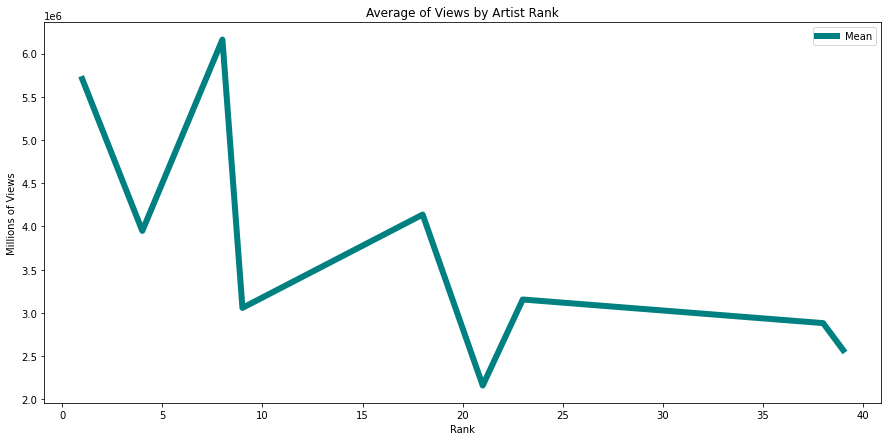

In [472]:
page_stats.plot(figsize=(15,7), y=["Mean"], title="Average of Views by Artist Rank", color="teal", linewidth=6)
plt.ylabel("Millions of Views")
plt.show()

### Featured Artists Analysis:

In this section, an artist ranked 39th is investigated to compare the trend in song popularity by a presence of other featured artists. From the piechart below, it can be seen that the artist has a score of 40% with songs that feature other artists out of 10 songs. With plotting this data into a bar graph, it can be viewed that these 4 songs with featured artists occupy 3 out of 4 positions in the artist's top songs with the heighest pyong (upvote) counts.

In [473]:
nickim_df = parse_raw_file(artist_names, "Nicki Minaj", "/Users/idilbilgic/Desktop/STAGE3.1/COMP30760/assignment1/genius_raw/artist39.json")
nickim_df.drop(["Rank", "Artist Name", "Release Month", "Page Views"], axis = 1, inplace=True)
nickim_df

,Pyong Count,Featured
Song Title,,
MotorSport,271,False
"Only (Ft. Chris Brown, Drake & Lil Wayne)",1921,True
Feeling Myself (Ft. Beyoncé),1330,True
Barbie Dreams,149,False
Truffle Butter (Ft. Drake & Lil Wayne),773,True
Beez In The Trap (Ft. 2 Chainz),96,True
Anaconda,900,False
Chun-Li,221,False
No Frauds,111,False


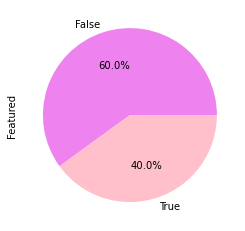

In [474]:
nm_pie = nickim_df["Featured"].value_counts().plot.pie(autopct='%1.1f%%', colors=["violet", "pink"])

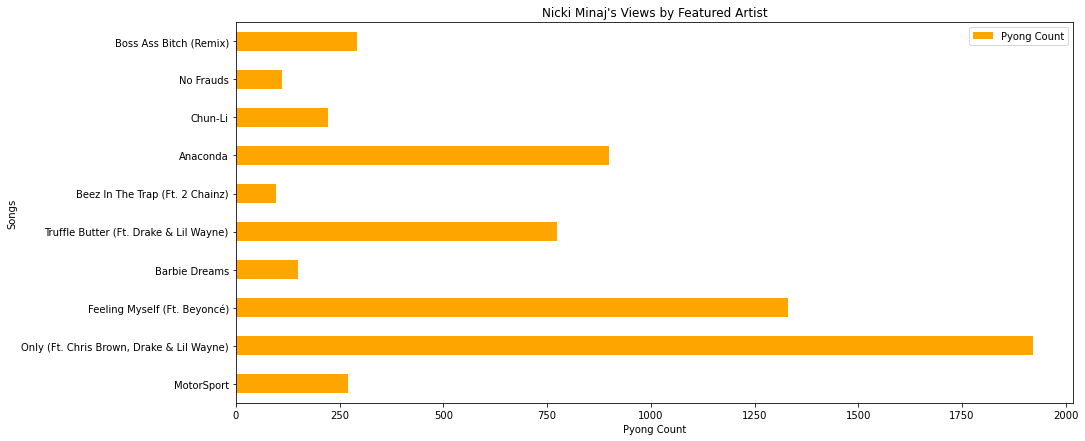

In [475]:
nm_bar = nickim_df.plot(kind="barh", figsize=(15,7), title="Nicki Minaj's Views by Featured Artist", color="orange")
nm_bar.set(xlabel="Pyong Count", ylabel="Songs")
plt.show()

From this graph, it can be concluded that there is a strong correlation between the popularity of a song and how many artists it features since the top 4 songs are:

1- Only (Ft. Chris Brown, Drake, Lil Wayne) --> 3 featured artists

2- Feeling Myself (Ft. Beyonce) --> 1 featured artist

3- Anaconda

4- Truffle Butter (Ft. Drake, Lil Wayne) --> 2 featured artists

### Release Date Analysis:

Top10 artists are merged in a dataframe to investigate the correlation between artist popularity and the months where their music was released. 

In [476]:
top10_names = ["Drake", "Ed Sheeran",  "The Weeknd", "Taylor Swift", "Ariana Grande", "Eminem", "Post Malone"]
top10_df = merge_raw_files(artist_names, "Drake", "Ed Sheeran",  "The Weeknd", "Taylor Swift", "Ariana Grande", "Eminem", "Post Malone")
top10_df

,Artist Name,Rank,Pyong Count,Page Views,Release Month,Featured
Song Title,,,,,,
God's Plan,Drake,1,932,9236547,1,False
In My Feelings,Drake,1,212,7459807,6,False
Hotline Bling,Drake,1,644,6960256,7,False
One Dance (Ft. Kyla & WizKid),Drake,1,233,6041789,4,True
"Hold On, We're Going Home (Ft. Majid Jordan)",Drake,1,506,5507582,8,True
...,...,...,...,...,...,...
I Fall Apart,Post Malone,9,207,2695015,12,False
Circles,Post Malone,9,207,2074014,8,False
Better Now,Post Malone,9,162,1712404,4,False


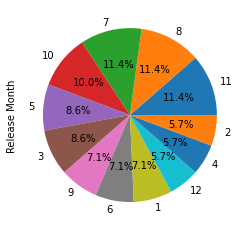

In [477]:
date_pie = top10_df["Release Month"].value_counts().plot.pie(autopct='%1.1f%%')

From this pie chart, it can be seen that the top 10 people in the music industry usually release their songs either in summer (11.4% each for June and August) or autumn (11.4% each for October and November). The reasons and results of this trend could be further researched including the days of the months (more on this in the "Conclusions" section below).

### Song Name Analysis:

In this analysis (which can be further investigated with proper tools I will be mentioning in Task 3), same artists' songs are listed side by side from the highest ranked artist to the lowest ranked artist in the Top10. This is an initial analysis which questions the popularity of a song according to naming trends, used words and number of words in the title. 

In [478]:
top10_df.drop(["Artist Name", "Featured", "Rank", "Page Views", "Release Month"], axis = 1, inplace=True)

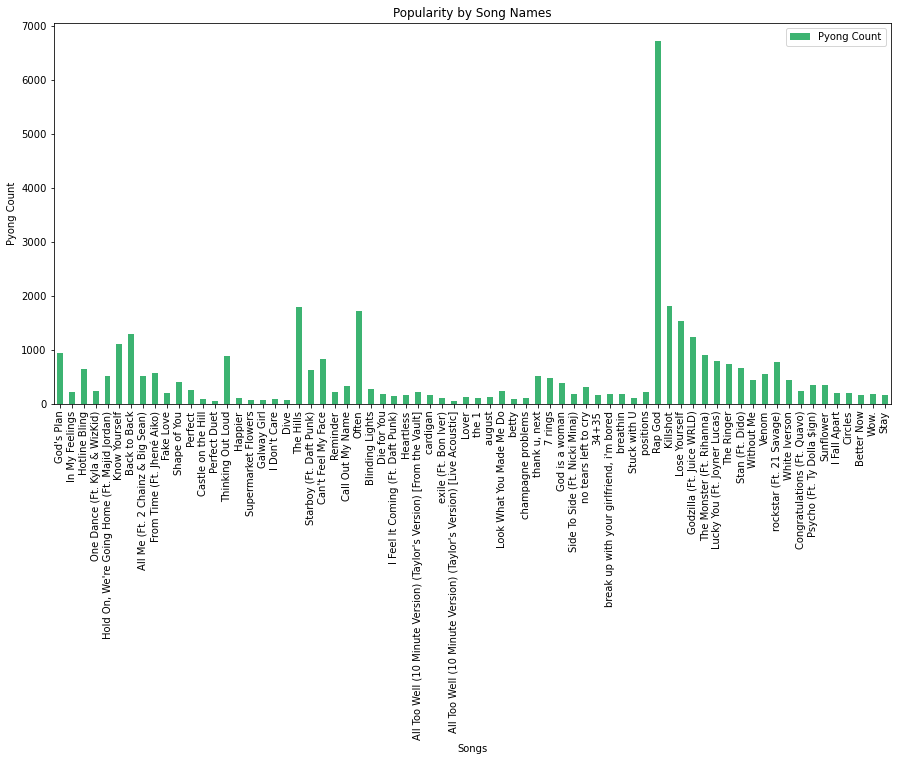

In [479]:
top10 = top10_df.plot(kind="bar", figsize=(15,7), title="Popularity by Song Names", color=["mediumseagreen"])
top10.set(xlabel="Songs", ylabel="Pyong Count")
plt.show()

From this graph, it can be seen that songs with complex lyrics have more pyong counts (upvotes/likes) as the songs with the highest pyong count are from rappers "Eminem" (ranked 8th) and "The Weeknd" (ranked 4th).

## Task 3

### Further Investigation:

Improving on the last analysis, there are more lyrics-specific tools that can be used.

The open library "lyricsgenius" can be used to collect artist names, songs and lyrics. This library can often take a bit longer to run as it is contacting the API to return and store the needed data as well as web scraping in the background. Hence, it is not used for this assignment. Nonetheless, it is a very powerful tool to utilise with its built-in funtions such as "save_lyrics()" which returns a given artist's song details and lyrics in a json file. 

LyricsGenius documentation = https://github.com/johnwmillr/LyricsGenius

Another analysis that can be improved further is the Release Date analysis. In this assignment, only the months' information is taken into consideration in the popularity versus release date analysis. However, this search can further be extended to days in order to investigate best times for releasing new music for achieving better popularity results. Lastly, including the years' information might require further analysis as songs that are released after 2015 onwards would have a better chance of achieving more popularity with the impact of internet and social media.  

### Conclusions:

The part that I struggled the most in this assignment was to start collecting data from an API as I tried a couple different APIs to find the one I am most comfortable with. After this challenging task, in Task 1, collecting data and storing it was a lot easier. I made sure to collect and store my data in a structured way in different aspects such as utilising dictionaries and following certain rules in file naming. This made it so much easier for me to access and manipulate data in Task 2. 

As it was mentioned in the "Data Preprocessing" section, there was not much need for data cleaning and preprocessing due to the way directories and files were structured. For "Data Parsing and Merging" I believe I was able to utilise the power of methods to create complex relationships in data for functions of parsing existing data, merging different components as well as loading and saving information.

As for the "Analysis" sections, I found it challenging at times to access relevant data provided by Genius API. While parsing, I tried to focus on numeric data such as dates and view counts. However, other than the data I parsed, there was not much relevant information to analyse. As a concluding note, in this notebook, artists are often compared within their music genre to avoid irregular data and trends.

Overall, I had a lot fun analysing trends in the music industry while also improving my data analysis skills and praticing concepts I learnt this term. In the future, I would definitely like to further investigate the correlation between song/artist popularity and their lyrics which I think would be extremely interesting to see from both music and human behavior standpoints.